In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/judicial-expenditures-across-all-50-states/jeee16t08.csv


# Introduction

Let's say we wanted to find which 3 variable correlated most with population for judicial expenditures.  

In [2]:
data=pd.read_csv("/kaggle/input/judicial-expenditures-across-all-50-states/jeee16t08.csv")
print('data successfully loaded.')

data successfully loaded.


# Preliminary Data Exploration

In [3]:
data.shape

(52, 11)

As we can see, the dataframe has 52 rows and 11 columns.  As there are 50 states, this leaves the question of why there are 52 rows.

In [4]:
data.head()

,State,Population 2016,Total justice system PC,Police Protection PC,Judicial and legal PC,Corrections PC,Total justice system Employment,police protection Total Employment,police protection Sworn only Employment,Judicial and legal Employment,Corrections Employment
0,Total,323071342,722.70,338.04,143.18,241.48,63.12,28.51,21.73,12.83,21.78
1,Alabama,4864745,480.11,257.21,74.43,148.47,55.43,29.08,23.00,9.73,16.62
2,Alaska,741504,1297.65,499.27,342.55,455.84,77.18,25.68,15.58,20.08,31.42
3,Arizona,6945452,709.77,325.62,141.59,242.56,66.07,28.30,20.43,15.91,21.85
4,Arkansas,2990410,503.99,231.09,73.68,199.21,68.44,29.50,22.11,11.52,27.41


The '0' index row is the total count for the whole country, explaining one of the extra values.  I suspect that the other value is Washington, D.C., so I look at the total column "State."

In [5]:
data['State']

0                    Total
1                  Alabama
2                   Alaska
3                  Arizona
4                 Arkansas
5               California
6                 Colorado
7              Connecticut
8                 Delaware
9     District of Columbia
10                 Florida
11                 Georgia
12                  Hawaii
13                   Idaho
14                Illinois
15                 Indiana
16                    Iowa
17                  Kansas
18                Kentucky
19               Louisiana
20                   Maine
21                Maryland
22           Massachusetts
23                Michigan
24               Minnesota
25             Mississippi
26                Missouri
27                 Montana
28                Nebraska
29                  Nevada
30           New Hampshire
31              New Jersey
32              New Mexico
33                New York
34          North Carolina
35            North Dakota
36                    Ohio
3

In row 9, this suspision is confirmed by the value "District of Columbia."  Going forward, this means that we can disregard the first row in our analysis and include the District of Columbia as if it were a state.  Next, we check for null values. 

In [6]:
data.isnull().sum()

State                                       0
Population 2016                             0
Total justice system PC                     0
Police Protection PC                        0
Judicial and legal PC                       0
Corrections PC                              0
Total justice system Employment             0
police protection Total Employment          0
police protection Sworn only Employment     0
Judicial and legal Employment               0
Corrections Employment                      0
dtype: int64

As we can see, there are no null values in this dataset, making our job much easier.  

# Numerical Analysis

In [7]:
data.describe()

,Population 2016,Total justice system PC,Police Protection PC,Judicial and legal PC,Corrections PC,Total justice system Employment,police protection Total Employment,police protection Sworn only Employment,Judicial and legal Employment,Corrections Employment
count,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,1.242582e+07,690.660577,322.158269,141.855192,226.646923,62.916154,28.313462,21.539038,13.510192,21.091154
std,4.450496e+07,187.468456,107.396671,50.892977,68.012654,11.790483,6.775407,6.321692,4.169876,4.866900
min,5.842900e+05,450.080000,160.320000,72.350000,141.860000,42.660000,19.760000,13.680000,7.290000,13.600000
25%,1.793929e+06,557.665000,262.160000,111.995000,177.062500,55.805000,24.902500,17.825000,10.792500,17.645000
50%,4.558222e+06,667.840000,297.555000,134.270000,209.160000,61.005000,27.570000,20.950000,12.785000,20.095000
75%,7.573746e+06,746.622500,352.662500,160.262500,248.925000,66.350000,29.652500,22.725000,15.540000,24.497500
max,3.230713e+08,1297.650000,864.210000,342.550000,455.840000,112.530000,63.360000,54.850000,29.390000,33.340000


The greatest spread is in the Total Justice System expenditures Per Capita, as measured by the standard deviation.  

To do some exploratory data visualization, we will use a sample of the largest states by population.

In [8]:
plot1data=data.nlargest(10, ['Population 2016'])
plot1data

,State,Population 2016,Total justice system PC,Police Protection PC,Judicial and legal PC,Corrections PC,Total justice system Employment,police protection Total Employment,police protection Sworn only Employment,Judicial and legal Employment,Corrections Employment
0,Total,323071342,722.70,338.04,143.18,241.48,63.12,28.51,21.73,12.83,21.78
5,California,39209127,1063.89,448.11,221.27,394.51,59.85,25.65,18.27,11.31,22.89
44,Texas,27937492,592.19,272.58,107.66,211.95,61.91,27.25,19.87,10.00,24.67
10,Florida,20629982,701.08,380.44,114.70,205.94,64.42,29.69,19.78,15.12,19.61
33,New York,19641589,1048.95,505.16,211.65,332.14,86.98,44.03,38.35,15.90,27.05
14,Illinois,12826895,671.84,406.65,120.78,144.41,60.34,31.95,25.49,10.68,17.71
39,Pennsylvania,12783538,714.15,290.79,148.86,274.49,63.48,25.13,20.88,14.17,24.18
36,Ohio,11635003,656.22,333.68,150.09,172.46,62.78,26.98,20.28,17.03,18.77
11,Georgia,10304763,568.02,263.81,117.93,186.28,66.31,26.65,21.33,13.89,25.77
34,North Carolina,10156679,576.85,322.10,75.23,179.52,60.49,27.51,22.46,7.43,25.55


In [9]:
import matplotlib.pyplot as plt

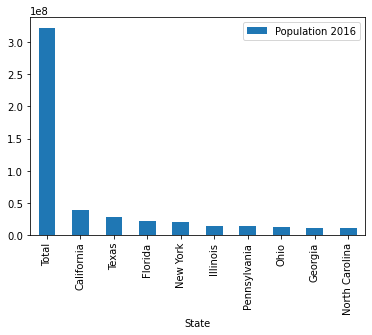

In [10]:
plot1data.plot.bar(x='State',y='Population 2016')

Unsurprisingly, the row for the total population skews the graph and makes it harder to read.  We will correct this by creating a new dataframe without the "total" row.  

In [11]:
plot2data=plot1data.iloc[1:10]
plot2data

,State,Population 2016,Total justice system PC,Police Protection PC,Judicial and legal PC,Corrections PC,Total justice system Employment,police protection Total Employment,police protection Sworn only Employment,Judicial and legal Employment,Corrections Employment
5,California,39209127,1063.89,448.11,221.27,394.51,59.85,25.65,18.27,11.31,22.89
44,Texas,27937492,592.19,272.58,107.66,211.95,61.91,27.25,19.87,10.00,24.67
10,Florida,20629982,701.08,380.44,114.70,205.94,64.42,29.69,19.78,15.12,19.61
33,New York,19641589,1048.95,505.16,211.65,332.14,86.98,44.03,38.35,15.90,27.05
14,Illinois,12826895,671.84,406.65,120.78,144.41,60.34,31.95,25.49,10.68,17.71
39,Pennsylvania,12783538,714.15,290.79,148.86,274.49,63.48,25.13,20.88,14.17,24.18
36,Ohio,11635003,656.22,333.68,150.09,172.46,62.78,26.98,20.28,17.03,18.77
11,Georgia,10304763,568.02,263.81,117.93,186.28,66.31,26.65,21.33,13.89,25.77
34,North Carolina,10156679,576.85,322.10,75.23,179.52,60.49,27.51,22.46,7.43,25.55


The new dataframe looks good, with the states listed by population.

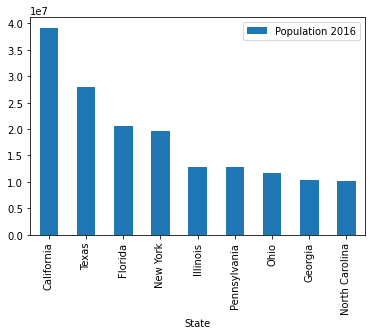

In [12]:
plot2data.plot.bar(x='State',y='Population 2016')

As we can see, the graph is more readable now.

Now, we can explore correlations between the various factors for the most populous states.

In [13]:
plot2data.corr()

,Population 2016,Total justice system PC,Police Protection PC,Judicial and legal PC,Corrections PC,Total justice system Employment,police protection Total Employment,police protection Sworn only Employment,Judicial and legal Employment,Corrections Employment
Population 2016,1.000000,0.629700,0.401611,0.557913,0.720655,-0.051925,-0.034166,-0.170579,-0.152402,0.071594
Total justice system PC,0.629700,1.000000,0.858259,0.933851,0.896495,0.516875,0.506651,0.458480,0.258691,0.171108
Police Protection PC,0.401611,0.858259,1.000000,0.707081,0.561198,0.532716,0.719698,0.623404,0.193588,-0.097029
Judicial and legal PC,0.557913,0.933851,0.707081,1.000000,0.857228,0.486462,0.387729,0.370821,0.453750,0.119723
Corrections PC,0.720655,0.896495,0.561198,0.857228,1.000000,0.372204,0.219319,0.214708,0.137186,0.420174
Total justice system Employment,-0.051925,0.516875,0.532716,0.486462,0.372204,1.000000,0.890177,0.898571,0.503602,0.484017
police protection Total Employment,-0.034166,0.506651,0.719698,0.387729,0.219319,0.890177,1.000000,0.961806,0.293303,0.216271
police protection Sworn only Employment,-0.170579,0.458480,0.623404,0.370821,0.214708,0.898571,0.961806,1.000000,0.242238,0.350464
Judicial and legal Employment,-0.152402,0.258691,0.193588,0.453750,0.137186,0.503602,0.293303,0.242238,1.000000,-0.181697
Corrections Employment,0.071594,0.171108,-0.097029,0.119723,0.420174,0.484017,0.216271,0.350464,-0.181697,1.000000


Now, let's see which 3 variables correlate the most with population (notice how the index is 4 because the top correlation will be the variable with itself)...

In [14]:
plot2data.corr().nlargest(4,['Population 2016'])

,Population 2016,Total justice system PC,Police Protection PC,Judicial and legal PC,Corrections PC,Total justice system Employment,police protection Total Employment,police protection Sworn only Employment,Judicial and legal Employment,Corrections Employment
Population 2016,1.000000,0.629700,0.401611,0.557913,0.720655,-0.051925,-0.034166,-0.170579,-0.152402,0.071594
Corrections PC,0.720655,0.896495,0.561198,0.857228,1.000000,0.372204,0.219319,0.214708,0.137186,0.420174
Total justice system PC,0.629700,1.000000,0.858259,0.933851,0.896495,0.516875,0.506651,0.458480,0.258691,0.171108
Judicial and legal PC,0.557913,0.933851,0.707081,1.000000,0.857228,0.486462,0.387729,0.370821,0.453750,0.119723


...and we plot the results.

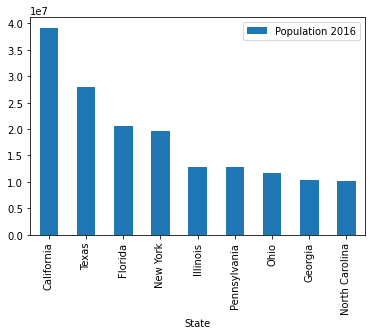

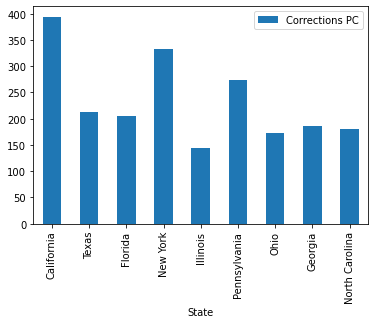

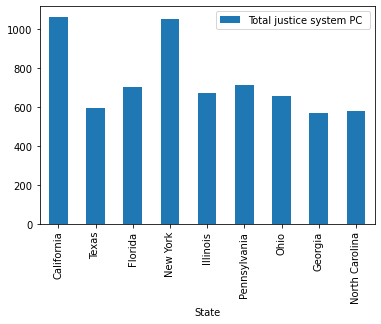

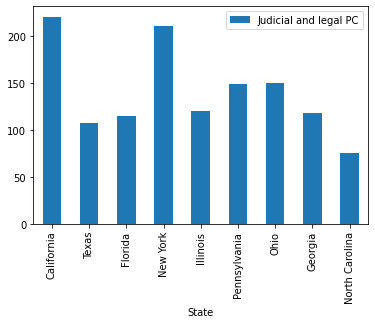

In [15]:
plot2data.plot.bar(x='State',y='Population 2016')
plot2data.plot.bar(x='State',y='Corrections PC')
plot2data.plot.bar(x='State',y='Total justice system PC ')
plot2data.plot.bar(x='State',y='Judicial and legal PC')

# Conclusion

We can see that the three variables in justice system expenditures that correlate the most with the population of the 9 biggest states by population are corrections per capita, total justice system expenditures per capita, and judicial and legal expenditures per capita.  Further work may be done to increase precision, such as removing or adjusting the outlying states of California and New York, which have such visibly higher values than the next closest states. 